<a href="https://colab.research.google.com/github/Aydino/Istannbul_Traffic_Data/blob/main/IBB_Trafik_Analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade geopandas

     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 52.7 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [3]:
!pip install --upgrade plotly_express

In [5]:
!pip install --upgrade contextily

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [41]:
!pip install --upgrade osmnx

     |████████████████████████████████| 93 kB 1.8 MB/s 
     |████████████████████████████████| 62 kB 698 kB/s 
     |████████████████████████████████| 994 kB 45.3 MB/s 
     |████████████████████████████████| 10.3 MB 27.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.

In [42]:
import numpy as np
import pandas as pd
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import contextily as cx
import osmnx as ox

%matplotlib inline

CSV verisini ekle

In [7]:
csv_url = "Ocak 2020 Trafik Yo_unluk Verisi.csv"
df=pd.read_csv(csv_url)
pd.read_csv(csv_url).head()


,_id,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
1,2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
2,3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
3,4,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
4,5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123


İncele

In [18]:
data_critic=df[['MAXIMUM_SPEED', 'MINIMUM_SPEED', 'AVERAGE_SPEED',"NUMBER_OF_VEHICLES"]]
data_critic.describe().round(0)

,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
count,1328624.0,1328624.0,1328624.0,1328624.0
mean,100.0,21.0,55.0,96.0
std,33.0,20.0,24.0,107.0
min,14.0,0.0,8.0,11.0
25%,73.0,6.0,33.0,28.0
50%,101.0,9.0,54.0,59.0
75%,126.0,37.0,77.0,121.0
max,235.0,103.0,131.0,1216.0


İstanbul'da genel olarak bakıldığınfa ortalama hızım 55km civarında olduğunu görüyoruz. Std büyüklüğü ise dağılımın ne kadar düzüensiz olduğunu gösteriyor.

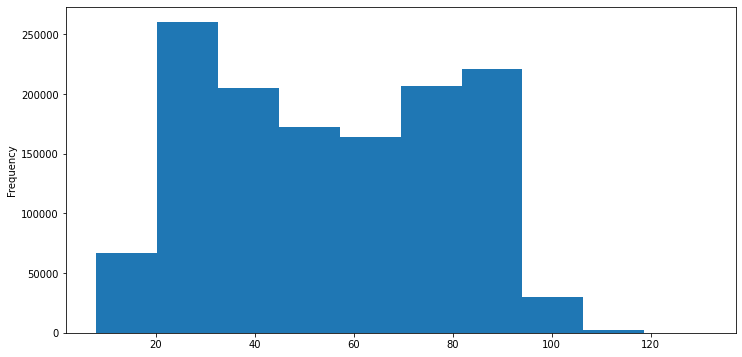

In [19]:
df['AVERAGE_SPEED'].plot.hist(figsize=(12,6))

Şimdi de araç sayısı ile araç ortalama hızı ilişkisine bakalım.

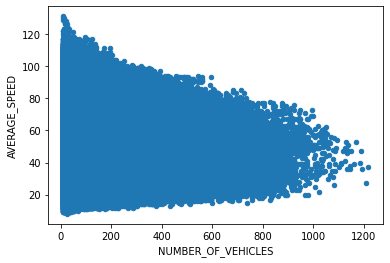

In [20]:
df.plot.scatter('NUMBER_OF_VEHICLES','AVERAGE_SPEED')

Linear Regresyon değerlendirne

In [21]:
df.dtypes

_id                     int64
DATE_TIME              object
LONGITUDE             float64
LATITUDE              float64
GEOHASH                object
MINIMUM_SPEED           int64
MAXIMUM_SPEED           int64
AVERAGE_SPEED           int64
NUMBER_OF_VEHICLES      int64
dtype: object

In [22]:
df.isnull().count()

_id                   1328624
DATE_TIME             1328624
LONGITUDE             1328624
LATITUDE              1328624
GEOHASH               1328624
MINIMUM_SPEED         1328624
MAXIMUM_SPEED         1328624
AVERAGE_SPEED         1328624
NUMBER_OF_VEHICLES    1328624
dtype: int64

In [23]:
df.isna().any().count()


9

In [24]:
df.isna()

,_id,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1328619,False,False,False,False,False,False,False,False,False
1328620,False,False,False,False,False,False,False,False,False
1328621,False,False,False,False,False,False,False,False,False
1328622,False,False,False,False,False,False,False,False,False


In [25]:
mask=df.isna()
data_cleaned = df.dropna()
data_cleaned

,_id,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
1,2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
2,3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
3,4,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
4,5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
...,...,...,...,...,...,...,...,...,...
1328619,1328620,2020-01-04 11:00:00,28.383179,41.168518,sxk4jy,6,49,22,14
1328620,1328621,2020-01-08 15:00:00,28.218384,41.119080,sxk1fj,55,132,83,71
1328621,1328622,2020-01-04 12:00:00,28.086548,41.190491,sx7fr4,55,129,81,90
1328622,1328623,2020-01-22 14:00:00,28.987427,41.108093,sxk9ge,8,87,43,100


In [26]:
data_cleaned.isna().count()

_id                   1328624
DATE_TIME             1328624
LONGITUDE             1328624
LATITUDE              1328624
GEOHASH               1328624
MINIMUM_SPEED         1328624
MAXIMUM_SPEED         1328624
AVERAGE_SPEED         1328624
NUMBER_OF_VEHICLES    1328624
dtype: int64

In [27]:
import statsmodels.formula.api as sm

Speed=data_cleaned['AVERAGE_SPEED']
Number=data_cleaned['NUMBER_OF_VEHICLES']
X = data_cleaned['AVERAGE_SPEED'].values

y = data_cleaned['NUMBER_OF_VEHICLES'].values

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



%20 Test verisi

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [30]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)
df1

,Actual,Predicted
0,39,103.834726
1,87,100.859265
2,113,104.292490
3,31,93.992814
4,116,94.908341
5,14,88.728536
6,129,102.919200
7,47,98.341566
8,51,100.401501
9,35,89.872944


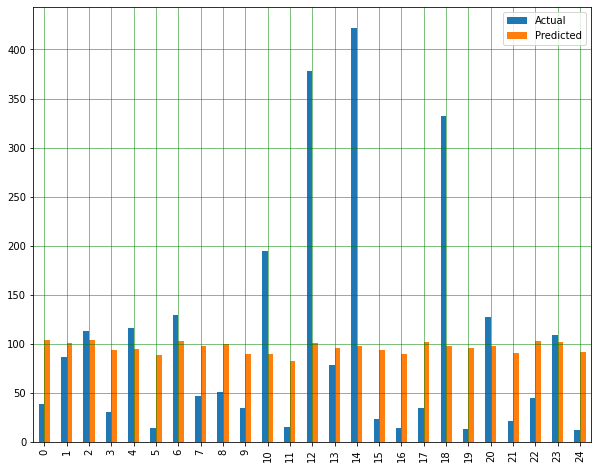

In [33]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 73.17384167911295
Mean Squared Error: 11380.346027290097
Root Mean Squared Error: 106.67870465697499


**Bu verilere göre taşıt sayısı ile ortalama araç hızı arasında bir bağlantı görülmemektedir. Bu sebeple trafik probleminin ana sebebinin araç sayısından çok altyapı yetersizliği olduğu görülmektedir.**

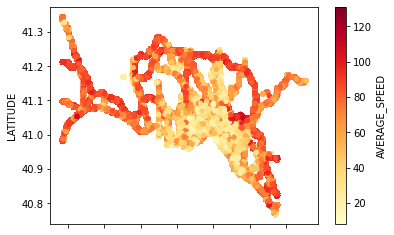

In [35]:
data_cleaned.plot(x='LONGITUDE', y="LATITUDE", kind="scatter", c='AVERAGE_SPEED',colormap="YlOrRd")

In [48]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


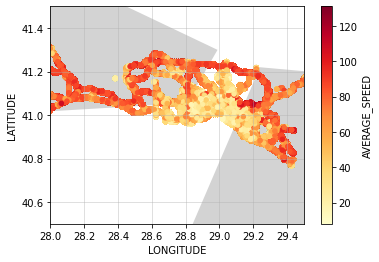

In [74]:
# initialize an axis
fig, ax = plt.subplots()
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Turkey"].plot(color="lightgrey",
                                                 ax=ax)

# plot points
data_cleaned.plot(x='LONGITUDE', y="LATITUDE", kind="scatter", c='AVERAGE_SPEED',colormap="YlOrRd", ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
ax.set_xlim(28, 29.5)
ax.set_ylim(40.5, 41.5)
plt.show()

En yavaş bölgeler

In [91]:
data_sorted=data_cleaned.sort_values(by='AVERAGE_SPEED')
region_critical_1000=data_sorted[:1000]
region_critical_1000

,_id,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
272649,272650,2020-01-10 15:00:00,28.976440,41.009216,sxk973,1,16,8,24
639560,639561,2020-01-25 15:00:00,28.976440,41.009216,sxk973,6,24,9,17
432431,432432,2020-01-02 15:00:00,28.976440,41.009216,sxk973,6,18,9,38
587315,587316,2020-01-20 18:00:00,28.965454,41.014709,sxk974,6,22,9,11
415416,415417,2020-01-16 15:00:00,28.965454,41.014709,sxk974,6,16,9,11
...,...,...,...,...,...,...,...,...,...
175994,175995,2020-01-25 17:00:00,29.075317,40.965271,sxk9j9,6,32,13,52
84280,84281,2020-01-04 17:00:00,28.833618,40.998230,sxk90p,6,57,13,62
164434,164435,2020-01-07 08:00:00,28.976440,41.009216,sxk973,7,22,13,24
366582,366583,2020-01-06 13:00:00,28.833618,41.009216,sxk921,6,37,13,73


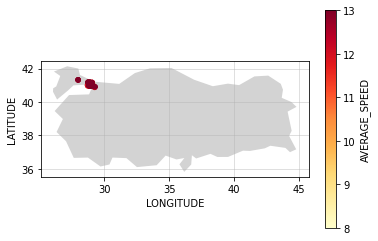

In [104]:
# initialize an axis
fig, ax = plt.subplots()
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Turkey"].plot(color="lightgrey",
                                                 ax=ax)

region_critical_1000.plot(x='LONGITUDE', y="LATITUDE", kind="scatter", c='AVERAGE_SPEED',colormap="YlOrRd", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()